Import Libraries and choose style(s) for our future plots.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

Step 0: Import and Read Data

In [ ]:
df_reg = pd.read_csv(r'C:\Users\Kerin B\Desktop\Datasets\nba_regular_2223.csv', delimiter=',')

Step 1: Understanding Our Data
- Dataframe shape
- head and tail of data
- dtypes

In [ ]:
df_reg.shape

In [ ]:
df_reg.head()

In [ ]:
df_reg.tail(5)

In [ ]:
df_reg.columns

In [ ]:
df_reg.dtypes

Step 2: Data Preparation and Cleaning
- checking for and removing duplicates
- removing unneeded/unnecessary columns

In [ ]:
counts = df_reg['Player'].value_counts()
players_to_drop = counts[counts > 1].index
total = 'TOT'
(players_to_drop)

In [ ]:
filtered_df = df_reg[~(df_reg['Player'].isin(players_to_drop) & (df_reg['Tm'] != total))]
filtered_df.shape

In [ ]:
number_of_players = filtered_df['Player'].value_counts().sum()
unique_players = df_reg['Player'].nunique()
print('Number of Entries:', number_of_players, '-- Number of Unique Players:', unique_players)

In [ ]:
duplicates_mask = filtered_df['Player'].duplicated()
duplicates_df = filtered_df[duplicates_mask]
print("Duplicate Rows:")
(duplicates_df)

In [ ]:
filtered_df_new = filtered_df.drop(['Rk', 'Age', 'Tm', 'GS'], axis=1)

In [66]:
filtered_df_new.set_index('Player', inplace = True)

Step 3: Creating New Columns
- MVP Eligibility based on Games Played and Average Minutes Played
- Drop Rows of Players who are not MVP Eligible

In [73]:
criteria1 = 65
criteria2 = 20
filtered_df_new['MVP Eligibility'] = np.where((filtered_df_new['G'] >= criteria1) & (filtered_df_new['MP'] >= criteria2), 'Yes', 'No')

In [74]:
df_reg_new = filtered_df_new[filtered_df_new['MVP Eligibility'] != 'No']

In [75]:
filtered_df_new.head(5)

,Pos,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MVP Eligibility
Player,,,,,,,,,,,,,,,,,,,,,
Precious Achiuwa,C,55,20.7,3.6,7.3,0.485,0.5,2.0,0.269,3.0,...,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2,No
Steven Adams,C,42,27.0,3.7,6.3,0.597,0.0,0.0,0.000,3.7,...,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6,No
Bam Adebayo,C,75,34.6,8.0,14.9,0.540,0.0,0.2,0.083,8.0,...,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4,Yes
Ochai Agbaji,SG,59,20.5,2.8,6.5,0.427,1.4,3.9,0.355,1.4,...,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9,No
Santi Aldama,PF,77,21.8,3.2,6.8,0.470,1.2,3.5,0.353,2.0,...,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0,Yes


Step 4: Feature Relationships

<Axes: title={'center': 'Top 10 Scorers'}, xlabel='Player', ylabel='Points Per Game'>

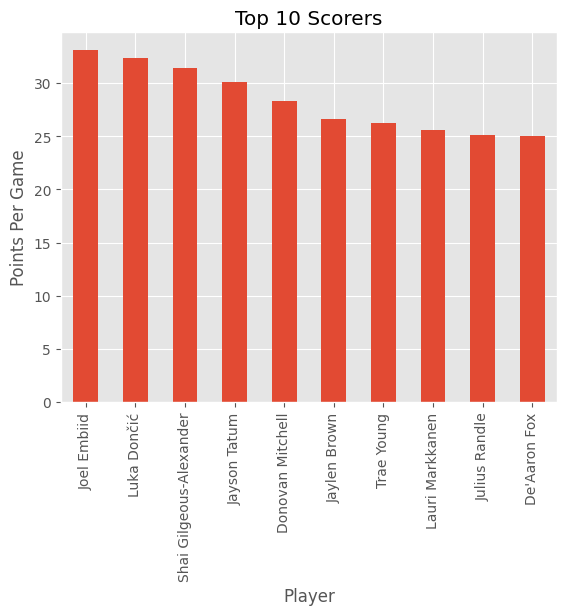

In [79]:
df_reg_pts = df_reg_new['PTS'].sort_values(ascending=False)
df_reg_pts.head(10).plot(kind='bar', title='Top 10 Scorers', xlabel = 'Player', ylabel = 'Points Per Game')